In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [2]:

# read the dataset
sales_df = pd.read_excel("sales_data.xlsx")
sales_df.head()

,CustomerID,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,FIRST_ORDER_DATE,LATEST_ORDER_DATE,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER,...,TIME_0000_0600_ORDERS,TIME_0601_1200_ORDERS,TIME_1200_1800_ORDERS,TIME_1801_2359_ORDERS,TIME_0000_0600_REVENUE,TIME_0601_1200_REVENUE,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE,Unnamed: 40,Unnamed: 41
0,22,124,11986.54,96.67,529.59,4.27,2016-12-30,2021-10-24,14.19,1,...,12,61,37,14,1067.92,5674.65,3916.53,1327.44,NaN,NaN
1,29,82,11025.96,134.46,97.92,1.19,2018-03-31,2021-10-24,15.89,1,...,1,13,24,44,30.25,3143.69,2205.47,5646.55,NaN,33212.76
2,83,43,7259.69,168.83,171.69,3.99,2017-11-30,2021-10-24,33.12,1,...,0,6,12,25,0.00,707.98,2560.91,3990.80,NaN,NaN
3,95,44,6992.27,158.92,92.82,2.11,2019-04-09,2021-10-24,21.11,1,...,0,10,13,21,0.00,1908.99,2025.05,3058.23,NaN,NaN
4,124,55,6263.44,113.88,179.04,3.26,2020-10-23,2021-10-24,6.65,1,...,6,9,27,13,501.34,1197.83,3004.77,1559.50,NaN,NaN


In [3]:
# basics of the df
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 42 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   CustomerID                 5000 non-null   int64         
 1   TOTAL_ORDERS               5000 non-null   int64         
 2   REVENUE                    5000 non-null   float64       
 3   AVERAGE_ORDER_VALUE        5000 non-null   float64       
 4   CARRIAGE_REVENUE           5000 non-null   float64       
 5   AVERAGESHIPPING            5000 non-null   float64       
 6   FIRST_ORDER_DATE           5000 non-null   datetime64[ns]
 7   LATEST_ORDER_DATE          5000 non-null   datetime64[ns]
 8   AVGDAYSBETWEENORDERS       5000 non-null   float64       
 9   DAYSSINCELASTORDER         5000 non-null   int64         
 10  MONDAY_ORDERS              5000 non-null   int64         
 11  TUESDAY_ORDERS             5000 non-null   int64         
 12  WEDNES

In [4]:
#null values
sales_df.isnull().sum()

CustomerID                      0
TOTAL_ORDERS                    0
REVENUE                         0
AVERAGE_ORDER_VALUE             0
CARRIAGE_REVENUE                0
AVERAGESHIPPING                 0
FIRST_ORDER_DATE                0
LATEST_ORDER_DATE               0
AVGDAYSBETWEENORDERS            0
DAYSSINCELASTORDER              0
MONDAY_ORDERS                   0
TUESDAY_ORDERS                  0
WEDNESDAY_ORDERS                0
THURSDAY_ORDERS                 0
FRIDAY_ORDERS                   0
SATURDAY_ORDERS                 0
SUNDAY_ORDERS                   0
MONDAY_REVENUE                  0
TUESDAY_REVENUE                 0
WEDNESDAY_REVENUE               0
THURSDAY_REVENUE                0
FRIDAY_REVENUE                  0
SATURDAY_REVENUE                0
SUNDAY_REVENUE                  0
WEEK1_DAY01_DAY07_ORDERS        0
WEEK2_DAY08_DAY15_ORDERS        0
WEEK3_DAY16_DAY23_ORDERS        0
WEEK4_DAY24_DAY31_ORDERS        0
WEEK1_DAY01_DAY07_REVENUE       0
WEEK2_DAY08_DA

In [5]:
# i have seen  that unnamed 40,41 doesnt have any use or data included so i removed the unnamed 40 and unnamed 41
# dropping feauture unnamed 40
sales_df.drop('Unnamed: 40',axis=1,inplace=True)

In [6]:
# dropped feauture unnamed 41
sales_df.drop('Unnamed: 41',axis=1,inplace=True)

In [7]:
# dataset after removing unnecessary feautures
sales_df.head()

,CustomerID,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,FIRST_ORDER_DATE,LATEST_ORDER_DATE,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER,...,WEEK3_DAY16_DAY23_REVENUE,WEEK4_DAY24_DAY31_REVENUE,TIME_0000_0600_ORDERS,TIME_0601_1200_ORDERS,TIME_1200_1800_ORDERS,TIME_1801_2359_ORDERS,TIME_0000_0600_REVENUE,TIME_0601_1200_REVENUE,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE
0,22,124,11986.54,96.67,529.59,4.27,2016-12-30,2021-10-24,14.19,1,...,2592.18,2409.71,12,61,37,14,1067.92,5674.65,3916.53,1327.44
1,29,82,11025.96,134.46,97.92,1.19,2018-03-31,2021-10-24,15.89,1,...,2807.66,4106.19,1,13,24,44,30.25,3143.69,2205.47,5646.55
2,83,43,7259.69,168.83,171.69,3.99,2017-11-30,2021-10-24,33.12,1,...,713.94,2861.90,0,6,12,25,0.00,707.98,2560.91,3990.80
3,95,44,6992.27,158.92,92.82,2.11,2019-04-09,2021-10-24,21.11,1,...,997.02,1260.08,0,10,13,21,0.00,1908.99,2025.05,3058.23
4,124,55,6263.44,113.88,179.04,3.26,2020-10-23,2021-10-24,6.65,1,...,2725.66,768.46,6,9,27,13,501.34,1197.83,3004.77,1559.50


In [8]:
sales_df['monetary']=sales_df['REVENUE']

### Prepare the data for modelling
- R (Recency): Number of days since last purchase
- F (Frequency): Number of tracsactions
- M (Monetary): Total amount of transactions (revenue contributed)

In [9]:
# monetary
grouped_df = sales_df.groupby('CustomerID')['monetary'].sum()
grouped_df = grouped_df.reset_index()
grouped_df.head()

,CustomerID,monetary
0,1,34847.40
1,2,32486.98
2,3,24178.97
3,4,18554.49
4,5,16884.99


In [10]:
# frequency
frequency = sales_df.groupby('CustomerID')['TOTAL_ORDERS'].sum()
frequency = frequency.reset_index()
frequency.columns = ['CustomerID', 'frequency']
frequency.head()

,CustomerID,frequency
0,1,61
1,2,59
2,3,53
3,4,84
4,5,26


In [11]:
# merge the two dfs
grouped_df = pd.merge(grouped_df, frequency, on='CustomerID', how='inner')
grouped_df.head()

,CustomerID,monetary,frequency
0,1,34847.40,61
1,2,32486.98,59
2,3,24178.97,53
3,4,18554.49,84
4,5,16884.99,26


In [12]:
# recency
last_purchase = sales_df.groupby('CustomerID')['DAYSSINCELASTORDER'].min()
last_purchase = last_purchase.reset_index()
last_purchase.head()

,CustomerID,DAYSSINCELASTORDER
0,1,53
1,2,94
2,3,53
3,4,5
4,5,130


In [13]:
# merge
grouped_df = pd.merge(grouped_df, last_purchase, on='CustomerID', how='inner')
grouped_df.columns = ['CustomerID', 'monetary', 'frequency', 'recency']
grouped_df.head()

,CustomerID,monetary,frequency,recency
0,1,34847.40,61,53
1,2,32486.98,59,94
2,3,24178.97,53,53
3,4,18554.49,84,5
4,5,16884.99,26,130


In [14]:
# creating quartile for rfm
grouped_df['r_quartile'] = pd.qcut(grouped_df['recency'], 4, ['1','2','3','4'])
grouped_df['f_quartile'] = pd.qcut(grouped_df['frequency'], 4, ['4','3','2','1'])
grouped_df['m_quartile'] = pd.qcut(grouped_df['monetary'], 4, ['4','3','2','1'])
grouped_df.head()

,CustomerID,monetary,frequency,recency,r_quartile,f_quartile,m_quartile
0,1,34847.40,61,53,2,1,1
1,2,32486.98,59,94,3,1,1
2,3,24178.97,53,53,2,1,1
3,4,18554.49,84,5,1,1,1
4,5,16884.99,26,130,3,1,1


In [15]:
#### Combine RFM Quantile score
grouped_df['RFM_Score'] = grouped_df.r_quartile.astype(str)+ grouped_df.f_quartile.astype(str) + grouped_df.m_quartile.astype(str)
grouped_df.head()

,CustomerID,monetary,frequency,recency,r_quartile,f_quartile,m_quartile,RFM_Score
0,1,34847.40,61,53,2,1,1,211
1,2,32486.98,59,94,3,1,1,311
2,3,24178.97,53,53,2,1,1,211
3,4,18554.49,84,5,1,1,1,111
4,5,16884.99,26,130,3,1,1,311


In [16]:
# Filter out Top/Best customers as (111)
grouped_df[grouped_df['RFM_Score']=='111'].sort_values('monetary', ascending=False).head()

,CustomerID,monetary,frequency,recency,r_quartile,f_quartile,m_quartile,RFM_Score
3,4,18554.49,84,5,1,1,1,111
16,17,12969.98,36,6,1,1,1,111
21,22,11986.54,124,1,1,1,1,111
28,29,11025.96,82,1,1,1,1,111
34,35,9685.37,32,5,1,1,1,111


In [17]:
# rescaling
rfm_df = grouped_df[['r_quartile', 'f_quartile', 'm_quartile']]

# instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(5000, 3)

In [18]:
# creating rfm_rescaled data frame
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['r_quartile', 'f_quartile', 'm_quartile']
rfm_df_scaled.head()

,r_quartile,f_quartile,m_quartile
0,-0.438219,-1.381129,-1.341641
1,0.452108,-1.381129,-1.341641
2,-0.438219,-1.381129,-1.341641
3,-1.328546,-1.381129,-1.341641
4,0.452108,-1.381129,-1.341641


In [19]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=3)

In [20]:
kmeans.labels_

array([0, 0, 0, ..., 1, 1, 2])

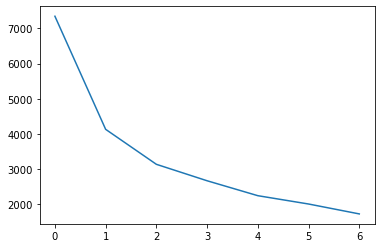

In [21]:
# elbow-curve
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

In [22]:
# observation: the elbow at k=3 the curve is high so k is takes as 3

In [23]:

# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=500)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.46059402951823303
For n_clusters=3, the silhouette score is 0.5281887949936963
For n_clusters=4, the silhouette score is 0.46780622925547793
For n_clusters=5, the silhouette score is 0.4593615129018573
For n_clusters=6, the silhouette score is 0.45936272606447276
For n_clusters=7, the silhouette score is 0.46939655845647266
For n_clusters=8, the silhouette score is 0.4716263416834361


In [24]:
# final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=500)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=500, n_clusters=3)

In [25]:
kmeans.labels_

array([1, 1, 1, ..., 2, 2, 0])

In [26]:
# assign the label
grouped_df['cluster_id'] = kmeans.labels_
grouped_df.head()

,CustomerID,monetary,frequency,recency,r_quartile,f_quartile,m_quartile,RFM_Score,cluster_id
0,1,34847.40,61,53,2,1,1,211,1
1,2,32486.98,59,94,3,1,1,311,1
2,3,24178.97,53,53,2,1,1,211,1
3,4,18554.49,84,5,1,1,1,111,1
4,5,16884.99,26,130,3,1,1,311,1


In [27]:
# creating feature rfm_score 1
grouped_df['RFM_Score1'] = grouped_df[['r_quartile','f_quartile','m_quartile']].sum(axis=1)

In [28]:
# printing rfm_score 1
print(grouped_df['RFM_Score1'].head())


0    211.0
1    311.0
2    211.0
3    111.0
4    311.0
Name: RFM_Score1, dtype: float64


In [29]:
grouped_df['RFM_Score1'] = grouped_df['r_quartile'].value_counts() + grouped_df['f_quartile'].value_counts()+ grouped_df['m_quartile'].value_counts()

In [30]:
grouped_df[grouped_df['RFM_Score']=='111'].sort_values('monetary', ascending=False).head(10)


,CustomerID,monetary,frequency,recency,r_quartile,f_quartile,m_quartile,RFM_Score,cluster_id,RFM_Score1
3,4,18554.49,84,5,1,1,1,111,1,NaN
16,17,12969.98,36,6,1,1,1,111,1,NaN
21,22,11986.54,124,1,1,1,1,111,1,NaN
28,29,11025.96,82,1,1,1,1,111,1,NaN
34,35,9685.37,32,5,1,1,1,111,1,NaN
35,36,9516.90,42,7,1,1,1,111,1,NaN
39,40,9099.36,26,6,1,1,1,111,1,NaN
40,41,9006.15,44,2,1,1,1,111,1,NaN
45,46,8854.30,43,6,1,1,1,111,1,NaN
47,48,8774.63,107,6,1,1,1,111,1,NaN


In [31]:
# labelling the label
grouped_df["cluster"] = kmeans.labels_

In [32]:
# aggregate values
grouped_df.groupby('cluster').agg({'recency':'mean','frequency':'mean','monetary':['mean', 'count']}).round(2)


recency frequency monetary      
           mean      mean     mean count
cluster                                 
0          6.33      4.07   471.02  1074
1         66.73     22.06  2964.87  2497
2        184.52      3.43   348.82  1429

In [33]:
#-- obserrvation  the above table represnts the mean of the rfm
# mean of recency with respect to cluster id-0 ,1,2 = 66.73,184.52,6.33 respectively
# mean of grequency with respect to cluster id-0 ,1,2 = 22.06,3.43,4.07 respectively
# mean of mean with respect to cluster id-0 ,1,2 = 2964.87,348.82,471.02 respectively

In [34]:
# observation:
# the count of cluster 0 = 2497
# the count of cluster 1 = 1429
# the count of cluster 2 = 1074

<AxesSubplot:xlabel='cluster', ylabel='monetary'>

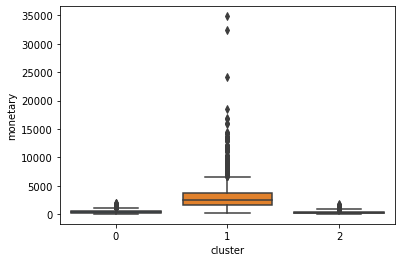

In [35]:
# boxplot for cluster vs monetary
sns.boxplot(x='cluster', y='monetary', data=grouped_df)

In [36]:
# observation: the above plot is overlapping to each other 

<AxesSubplot:xlabel='cluster', ylabel='frequency'>

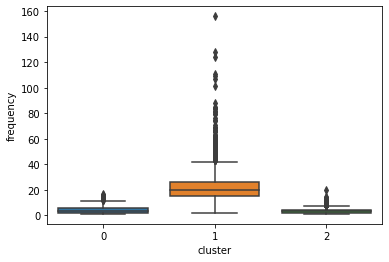

In [37]:
# boxplot for cluster vs frequency
sns.boxplot(x='cluster', y='frequency', data=grouped_df)

<AxesSubplot:xlabel='cluster', ylabel='recency'>

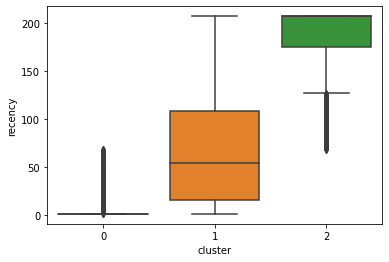

In [38]:
# boxplot for cluster vs recency
sns.boxplot(x='cluster', y='recency', data=grouped_df)

In [39]:
grouped_df.describe()

,CustomerID,monetary,frequency,recency,cluster_id,RFM_Score1,cluster
count,5000.000000,5000.000000,5000.00000,5000.000000,5000.00000,0.0,5000.00000
mean,40709.227800,1681.523840,12.87040,87.420000,1.07100,NaN,1.07100
std,49949.848017,1998.618678,12.67988,80.156513,0.70403,NaN,0.70403
min,1.000000,38.500000,1.00000,1.000000,0.00000,NaN,0.00000
25%,1687.500000,315.097500,3.00000,7.000000,1.00000,NaN,1.00000
50%,13765.000000,966.725000,8.00000,68.000000,1.00000,NaN,1.00000
75%,71891.500000,2493.072500,20.00000,171.250000,2.00000,NaN,2.00000
max,277160.000000,34847.400000,156.00000,207.000000,2.00000,NaN,2.00000


{'whiskers': [<matplotlib.lines.Line2D at 0x22f63c8e5b0>,
 'caps': [<matplotlib.lines.Line2D at 0x22f63c8ecd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x22f63c8e1f0>],
 'medians': [<matplotlib.lines.Line2D at 0x22f63c99430>],
 'fliers': [<matplotlib.lines.Line2D at 0x22f63c997c0>],
 'means': []}

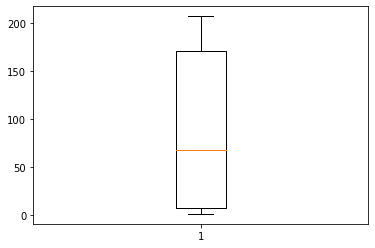

In [40]:
# boxplot to check the outliers
plt.boxplot(grouped_df['recency'])

{'whiskers': [<matplotlib.lines.Line2D at 0x22f63a8ed00>,
 'caps': [<matplotlib.lines.Line2D at 0x22f63bfa460>,
 'boxes': [<matplotlib.lines.Line2D at 0x22f63a8e9d0>],
 'medians': [<matplotlib.lines.Line2D at 0x22f63bfab80>],
 'fliers': [<matplotlib.lines.Line2D at 0x22f63bfaf10>],
 'means': []}

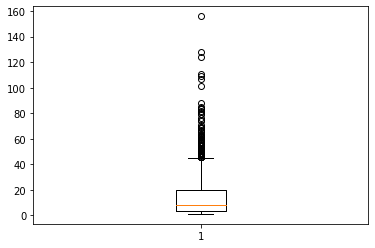

In [41]:
# boxplot to check the outliers
plt.boxplot(grouped_df['frequency'])

{'whiskers': [<matplotlib.lines.Line2D at 0x22f63ad1be0>,
 'caps': [<matplotlib.lines.Line2D at 0x22f63ac2340>,
 'boxes': [<matplotlib.lines.Line2D at 0x22f63c99ac0>],
 'medians': [<matplotlib.lines.Line2D at 0x22f63ac2a60>],
 'fliers': [<matplotlib.lines.Line2D at 0x22f63ac2df0>],
 'means': []}

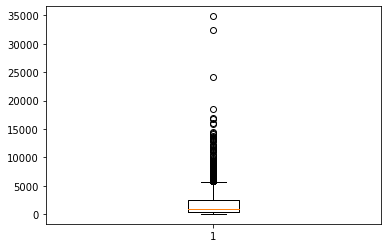

In [42]:
# boxplot to check the outliers
plt.boxplot(grouped_df['monetary'])

In [43]:
# the outliers are effecting the output so removing the outliers by statistical approach

In [44]:
# removing (statistical) outliers
Q1 = grouped_df.monetary.quantile(0.10)
Q3 = grouped_df.monetary.quantile(0.90)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df.monetary >= Q1 - 1.5*IQR) & (grouped_df.monetary <= Q3 + 1.5*IQR)]

# outlier treatment for recency
Q1 = grouped_df.recency.quantile(0.10)
Q3 = grouped_df.recency.quantile(0.90)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df.recency >= Q1 - 1.5*IQR) & (grouped_df.recency <= Q3 + 1.5*IQR)]

# outlier treatment for frequency
Q1 = grouped_df.frequency.quantile(0.10)
Q3 = grouped_df.frequency.quantile(0.90)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df.frequency >= Q1 - 1.5*IQR) & (grouped_df.frequency <= Q3 + 1.5*IQR)]

In [45]:
# creating quartiles for rfm
grouped_df['r_quartile'] = pd.qcut(grouped_df['recency'], 4, ['1','2','3','4'])
grouped_df['f_quartile'] = pd.qcut(grouped_df['frequency'], 4, ['4','3','2','1'])
grouped_df['m_quartile'] = pd.qcut(grouped_df['monetary'], 4, ['4','3','2','1'])
grouped_df.head()

,CustomerID,monetary,frequency,recency,r_quartile,f_quartile,m_quartile,RFM_Score,cluster_id,RFM_Score1,cluster
36,37,9378.67,47,17,2,1,1,211,1,NaN,1
37,38,9281.38,40,111,3,1,1,311,1,NaN,1
38,39,9172.22,54,131,3,1,1,311,1,NaN,1
39,40,9099.36,26,6,1,1,1,111,1,NaN,1
40,41,9006.15,44,2,1,1,1,111,1,NaN,1


In [46]:
#### Combine RFM Quantile score
grouped_df['RFM_Score'] = grouped_df.r_quartile.astype(str)+ grouped_df.f_quartile.astype(str) + grouped_df.m_quartile.astype(str)
grouped_df.head()
# Filter out Top/Best customers as (111)
grouped_df[grouped_df['RFM_Score']=='111'].sort_values('monetary', ascending=False).head()

,CustomerID,monetary,frequency,recency,r_quartile,f_quartile,m_quartile,RFM_Score,cluster_id,RFM_Score1,cluster
39,40,9099.36,26,6,1,1,1,111,1,NaN,1
40,41,9006.15,44,2,1,1,1,111,1,NaN,1
45,46,8854.30,43,6,1,1,1,111,1,NaN,1
48,49,8711.50,47,2,1,1,1,111,1,NaN,1
72,73,7721.85,20,5,1,1,1,111,1,NaN,1


In [47]:
# rescaling
rfm_df = grouped_df[['r_quartile', 'f_quartile', 'm_quartile']]

# instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(4953, 3)

In [48]:
# creating data frame rfm_df_scaled
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['r_quartile', 'f_quartile', 'm_quartile']
rfm_df_scaled.head()

,r_quartile,f_quartile,m_quartile
0,-0.438189,-1.352022,-1.341767
1,0.452028,-1.352022,-1.341767
2,0.452028,-1.352022,-1.341767
3,-1.328406,-1.352022,-1.341767
4,-1.328406,-1.352022,-1.341767


In [49]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=4)

In [50]:
kmeans.labels_

array([3, 2, 2, ..., 1, 1, 0])

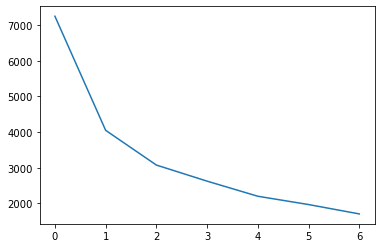

In [51]:
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

In [52]:
# observation : the elbow curve at 3 is high so taking k is 3

In [53]:

# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=500)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.4597316973921141
For n_clusters=3, the silhouette score is 0.5304146511231689
For n_clusters=4, the silhouette score is 0.46990851488326785
For n_clusters=5, the silhouette score is 0.45784698380846517
For n_clusters=6, the silhouette score is 0.4471325730552637
For n_clusters=7, the silhouette score is 0.4561735583400728
For n_clusters=8, the silhouette score is 0.47487139106103077


In [54]:
# final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=500)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=500, n_clusters=3)

In [55]:
kmeans.labels_

array([0, 0, 0, ..., 1, 1, 2])

In [56]:
# assign the label
grouped_df['cluster_id'] = kmeans.labels_
grouped_df.head()

,CustomerID,monetary,frequency,recency,r_quartile,f_quartile,m_quartile,RFM_Score,cluster_id,RFM_Score1,cluster
36,37,9378.67,47,17,2,1,1,211,0,NaN,1
37,38,9281.38,40,111,3,1,1,311,0,NaN,1
38,39,9172.22,54,131,3,1,1,311,0,NaN,1
39,40,9099.36,26,6,1,1,1,111,0,NaN,1
40,41,9006.15,44,2,1,1,1,111,0,NaN,1


In [57]:
grouped_df['RFM_Score1'] = grouped_df[['r_quartile','f_quartile','m_quartile']].sum(axis=1)

In [58]:
print(grouped_df['RFM_Score1'].head())


36    211.0
37    311.0
38    311.0
39    111.0
40    111.0
Name: RFM_Score1, dtype: float64


In [59]:

grouped_df['RFM_Score1'] = grouped_df['r_quartile'].value_counts() + grouped_df['f_quartile'].value_counts()+ grouped_df['m_quartile'].value_counts()

In [60]:
grouped_df[grouped_df['RFM_Score']=='111'].sort_values('monetary', ascending=False).head(10)


,CustomerID,monetary,frequency,recency,r_quartile,f_quartile,m_quartile,RFM_Score,cluster_id,RFM_Score1,cluster
39,40,9099.36,26,6,1,1,1,111,0,NaN,1
40,41,9006.15,44,2,1,1,1,111,0,NaN,1
45,46,8854.30,43,6,1,1,1,111,0,NaN,1
48,49,8711.50,47,2,1,1,1,111,0,NaN,1
72,73,7721.85,20,5,1,1,1,111,0,NaN,1
74,75,7649.71,54,4,1,1,1,111,0,NaN,1
75,76,7518.00,39,7,1,1,1,111,0,NaN,1
79,80,7390.98,40,3,1,1,1,111,0,NaN,1
82,83,7259.69,43,1,1,1,1,111,0,NaN,1
84,85,7173.63,43,4,1,1,1,111,0,NaN,1


In [61]:
grouped_df["cluster"] = kmeans.labels_

In [62]:
# aggreagate function of rfm
grouped_df.groupby('cluster').agg({'recency':'mean','frequency':'mean','monetary':['mean', 'count']}).round(2)


recency frequency monetary      
           mean      mean     mean count
cluster                                 
0         66.85     21.21  2778.02  2460
1        184.64      3.41   347.21  1425
2          6.35      4.03   468.31  1068

In [63]:
#-- obserrvation  the above table represnts the mean of the rfm
# mean of recency with respect to cluster id-0 ,1,2 = 184.64,66.85,6.35 respectively
# mean of grequency with respect to cluster id-0 ,1,2 = 3.41,21.21,4.03 respectively
# mean of mean with respect to cluster id-0 ,1,2 = 347.21,2778.02,468.31 respectively

In [64]:
# observation:
# the count of cluster 0 = 2460
# the count of cluster 1 = 1425
# the count of cluster 2 = 1068

<AxesSubplot:xlabel='cluster', ylabel='recency'>

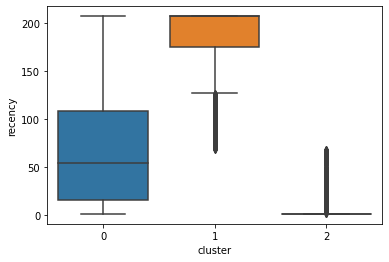

In [65]:
# box plot for cluster vs recency
sns.boxplot(x='cluster', y='recency', data=grouped_df)

In [66]:
# observation: 

# the cluster 0 recency is medium
# the cluster 1 recency is high
# the cluster 2 recency is low


<AxesSubplot:xlabel='cluster', ylabel='frequency'>

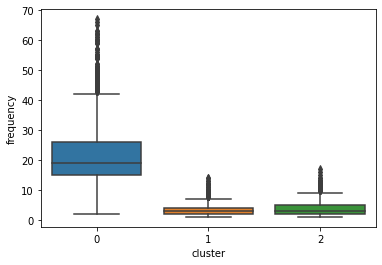

In [67]:
# box plot for cluster vs frequency
sns.boxplot(x='cluster', y='frequency', data=grouped_df)

In [68]:
# observation: 

# the cluster 0 frequency is high
# the cluster 1 frequency is low
# the cluster 2 frequency is medium

<AxesSubplot:xlabel='cluster', ylabel='monetary'>

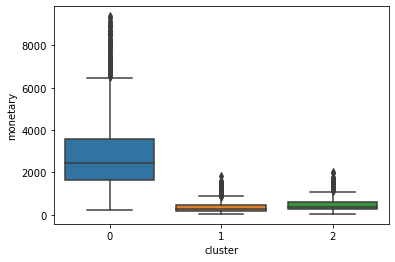

In [69]:
# box plot for cluster vs monetary
sns.boxplot(x='cluster', y='monetary', data=grouped_df)

In [70]:
# observation: 

# the cluster 0 monetary is high
# the cluster 1 monetary is low
# the cluster 2 monetary is medium

# EDA_ANALYSIS

In [71]:
agg=grouped_df.groupby('cluster').agg({'recency':'mean','frequency':'mean','monetary':'mean'}).round(2)
agg

,recency,frequency,monetary
cluster,,,
0,66.85,21.21,2778.02
1,184.64,3.41,347.21
2,6.35,4.03,468.31


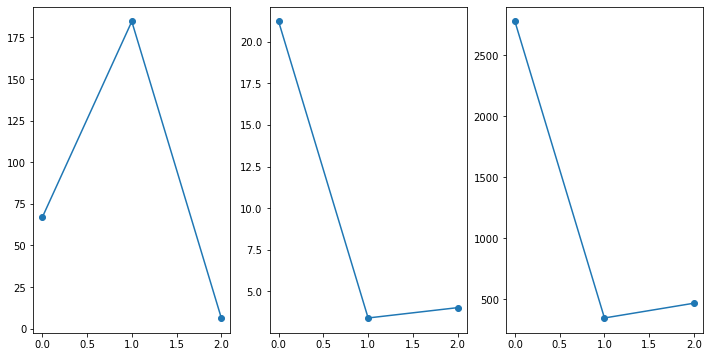

In [72]:
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.plot(agg['recency'],'-o')
plt.subplot(1,3,2)
plt.plot(agg['frequency'],'-o')
plt.subplot(1,3,3)
plt.plot(agg['monetary'],'-o')

In [73]:
# observation

#recency :  cluster 0 has high recency ,cluster 1 has medium recency ,cluster 2 has low recency

#frequency :  cluster 0 has low frequency ,cluster 1 has high frequency ,cluster 2 has medium frequency

#monetary :  cluster 0 has low monetary ,cluster 1 has high monetary ,cluster 2 has medium monetary

<AxesSubplot:xlabel='cluster', ylabel='count'>

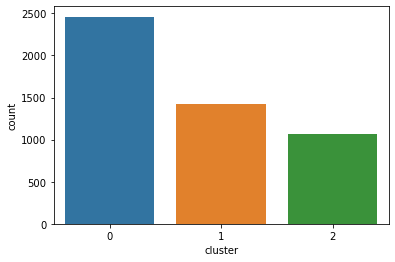

In [74]:
# couning the cluster values plot
sns.countplot(grouped_df['cluster'])

In [75]:
# observation:
# the count of cluster 0 =  2460
# the count of cluster 1 = 1425
# the count of cluster 2 = 1068

<AxesSubplot:xlabel='cluster', ylabel='RFM_Score'>

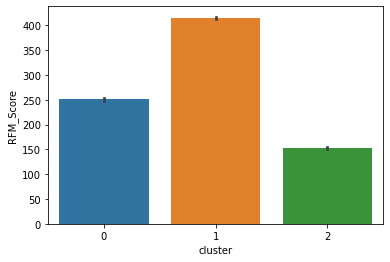

In [76]:
# cluster and its  rfm score  plot
grouped_df['RFM_Score']=grouped_df['RFM_Score'].astype('float')
sns.barplot(grouped_df['cluster'],grouped_df['RFM_Score'])

In [77]:
# rfm score
# o clsuter rfm score = 450
# 1 clsuter rfm score = 251
# 2 clsuter rfm score = 150

In [78]:
# DAY WISE ORDERS
daywiseorders=sales_df[['MONDAY_ORDERS','TUESDAY_ORDERS','WEDNESDAY_ORDERS','THURSDAY_ORDERS','FRIDAY_ORDERS','SATURDAY_ORDERS','SUNDAY_ORDERS']].sum()

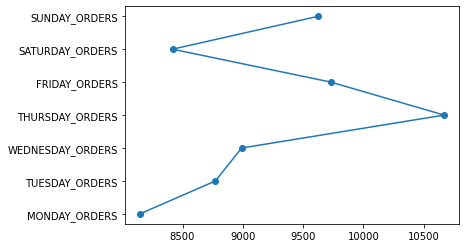

In [79]:
plt.plot(daywiseorders.values,daywiseorders.index,'-o')

In [80]:
# The thursday order are high followed by friday and sunday
# monday,tuesday,wednesday and saturday are low

In [81]:
# day wise orders
revenue_day_wise=sales_df[['MONDAY_REVENUE','TUESDAY_REVENUE','WEDNESDAY_REVENUE','THURSDAY_REVENUE','FRIDAY_REVENUE','SATURDAY_REVENUE','SUNDAY_REVENUE']].sum()

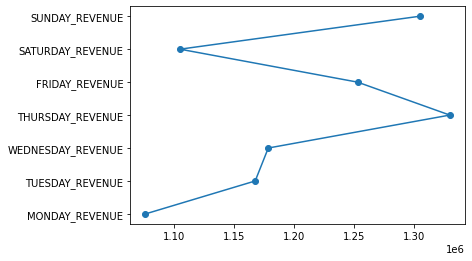

In [82]:
plt.plot(revenue_day_wise.values,revenue_day_wise.index,'-o')

In [83]:
# observation : 
#  thursday,friday and sunday are high
# monday,tuesday,wednesdaya and saturday are low

In [84]:
# week wise orders plot

week=sales_df[['WEEK1_DAY01_DAY07_ORDERS','WEEK2_DAY08_DAY15_ORDERS','WEEK3_DAY16_DAY23_ORDERS','WEEK4_DAY24_DAY31_ORDERS']].sum()

<AxesSubplot:>

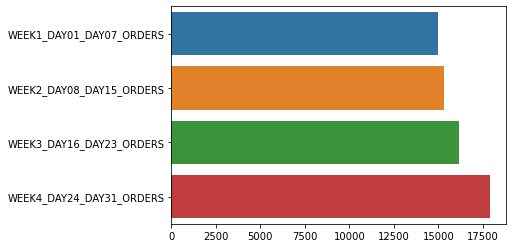

In [85]:
sns.barplot(x=week.values,y=week.index)

In [86]:
# observation:
# -- week 4 has highest orders and respectively 3rd ,2nd and 1st


In [87]:
# week wise revenue plot
week_revenue=sales_df[['WEEK1_DAY01_DAY07_REVENUE','WEEK2_DAY08_DAY15_REVENUE','WEEK3_DAY16_DAY23_REVENUE','WEEK4_DAY24_DAY31_REVENUE']].sum()

<AxesSubplot:>

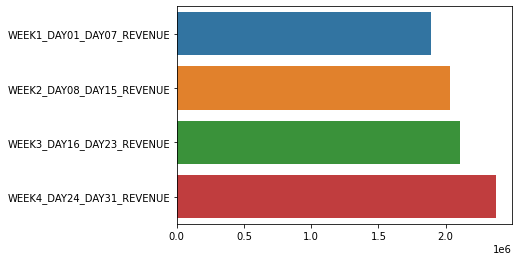

In [88]:
sns.barplot(x=week_revenue.values,y=week_revenue.index)

In [89]:
# observation : week 4 has highest revenue

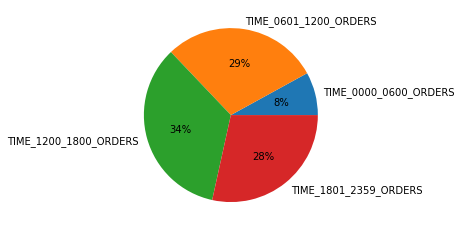

In [90]:
# TIME WISE ORDERS PLOT
time_orders=sales_df[['TIME_0000_0600_ORDERS','TIME_0601_1200_ORDERS', 'TIME_1200_1800_ORDERS','TIME_1801_2359_ORDERS']].sum()
plt.pie(time_orders,labels=time_orders.index,autopct='%.0f%%');

In [91]:
# observation : the time being 12:00_18:00 is high

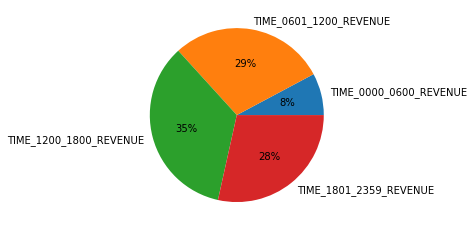

In [92]:
# TIME WISE REVENUE PLOT\
time_revenue=sales_df[['TIME_0000_0600_REVENUE','TIME_0601_1200_REVENUE', 'TIME_1200_1800_REVENUE','TIME_1801_2359_REVENUE']].sum()
plt.pie(time_revenue,labels=time_revenue.index,autopct='%.0f%%');

In [93]:
# observation : revenue at time being 12:00_18:00 is high and at 00:00_06:00 is low

# SUMMARY

### 1.  THE CLUSTER 1 CUSTOMERS ARE  WITH HIGH MONETARY AND FREQUENCY

### 2. THE CLUSTER 0 CUSTOMERS ARE ALMOST CHURNED

### 3. THE CLUSTER 2 CUSTOMERS ARE NEXT IMPORTANT CUSTOMERS

### 4. THURSAY THE ORDERS AND REVENUE IS VERY HIGH ,RESPECTIVELY ON FRIDAY AND SUNDAY

### 5. SUNDAY THE ORDERS ARE COMPARITIVELY LOW BUT THE REVENUE IS HIGH

### 6. WEEK 4 HAS MORE ORDERS AND REVENUE

### 7. THE SALES AND REVENUES ARE GRADUALLY INCREASING AS  WEEK INCREASES(MONTH_END)

### 8. AT 12:00_18:00 THE ORDER PLACING AND REVENUE GENERATING IS HIGH

# DECISIONS TO TAKE:



### 1.CLUSTER 2  CUSTOMER SHOULD BE TAKEN CARE AS THEY ARE ALSO POTENTIAL CUSTOMERS OTHERWISE THEY WILL CHURN GRADUALLY

### 2.MONDAY ,TUESDAY,WEDNESDAY AND SATURDAY THE ORDERS AND REVENUE ARE LOW SO WE NEED TO PROVIDE SOME OFFERS TO MAKE THEM ORDER IN THOSE DAYS

### 3. THE CUSTOMER SERVICE SHOULD BE HIGH ON THURSDAY,FRIDAY AND SUNDAY

### 4. THE CUSTOMER SERVICES SHOULD BE HIGH AT 12:00_18:00 RESPECTIVELY FROM 18:00_00:00 AS THE ORDERS AND REVENUE ARE HIGH

#  UNDERSTANDING THE DATA

- Data Set is a sales data which consisting of 5000 rows and 40 columns after remooving unnecessary data . 
- In Data set, 38 feautures are int,float variables and other 2 are datatimestamp feautures
- There are no missing values
- the data is detailing that the sales of an organization
- the data is having the details of the revenue,orders by the customers and also the behaviour of sales distinguished according    week ,days and time consideration


# MODEL SELECTION AND SEGMENTATION

- As we dont have any output feauture ,so i considered the unsupervised for data modellng
- The problem statement stated that use RFM model ,so i used RFM features to analysis 
- The need of the model is customer segmentation ,which is a clustering task , so i used the kmeans ++ for model 


# Ranking

### CLUSTER  0 ARE CHAMPIONS
### CLUSTER 2 ARE POTENTIAL CUSTOMERS
### CLUSTER 1  CUSTOMERS NEED ATTENTION